# ScenarioC

In [1]:
import numpy as np
import simpy
import matplotlib.pyplot as plt

### generate sequences for machines 

In [2]:
# generate n types of machine
np.random.seed(5)
Machine_num = np.random.randint(10,20)
print("The total types of machines:\n", Machine_num)
#label each machine
Machine_label = []
for i in range(0,Machine_num):
    Machine_label.append(i)
print("labels for each machine:\n", Machine_label)

The total types of machines:
 13
labels for each machine:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


### generate products

In [3]:
Product_num = np.random.randint(15,25)
print("The total types of products:\n", Product_num)

The total types of products:
 21


In [4]:
"""
The numbers of machines that a type of product need to go through
Assume that the needed machines vary from 2-8
"""
np.random.seed(6)
procedure_num = []
for i in range(Product_num):
    procedure_num.append(np.random.randint(3,6))
print("Numbers of machines for each type of product:\n",procedure_num)

Numbers of machines for each type of product:
 [5, 4, 3, 5, 4, 5, 3, 5, 4, 4, 4, 4, 5, 4, 3, 5, 3, 4, 3, 5, 3]


### Production sequence 

In [5]:
import copy
#create a two dimentionnal list
product_seq = [[0 for i in range(max(procedure_num))]for j in range(Product_num)]
np.random.seed(8)
#fill in the list
for i in range(Product_num):
    procedures = procedure_num[i]
    machine_copy = copy.copy(Machine_label)

    for j in range(procedures):
        length = len(machine_copy)    
        x=np.random.randint(0,length)
        product_seq[i][j] = machine_copy[x]
        machine_copy.pop(x)
        
    product_seq[i] = product_seq[i][0:procedures]
print("Producting Sequence: ")    
print(product_seq)

"""
The product_seq shows that the procesures of each producting sequence, eg. the first list shows the production 
process of product1, it needs to go through the machine3, machine4, machine1 and machine9 to finish the 
production processing.
"""

Producting Sequence: 
[[3, 5, 1, 12, 8], [10, 8, 3, 11], [0, 6, 2], [3, 11, 10, 2, 4], [6, 9, 11, 3], [4, 6, 7, 10, 2], [6, 10, 5], [1, 12, 7, 5, 8], [8, 11, 0, 9], [2, 7, 9, 5], [11, 8, 10, 6], [11, 4, 6, 2], [2, 7, 8, 9, 11], [10, 9, 6, 0], [9, 2, 8], [9, 2, 7, 4, 0], [9, 0, 1], [6, 10, 8, 4], [7, 10, 4], [8, 2, 9, 3, 12], [6, 5, 2]]


'\nThe product_seq shows that the procesures of each producting sequence, eg. the first list shows the production \nprocess of product1, it needs to go through the machine3, machine4, machine1 and machine9 to finish the \nproduction processing.\n'

### Input sequence

In [6]:
nums_input_seq = 5   #numbers of input sequence is 5
inpro_seq = []  #store the input products in each sequence
np.random.seed(2)
for i in range(nums_input_seq):
    inpro_seq.append(np.random.randint(100,150))
print("The number of products in each sequence：\n", inpro_seq )

The number of products in each sequence：
 [140, 115, 145, 108, 122]


In [7]:
S=[]
#np.random.seed(10)
print("The input production sequences for each line:")
for i in range(nums_input_seq):
    S.append([np.random.randint(0,Product_num)])
    for j in range(inpro_seq[i]):
        S[i].append(np.random.randint(0,Product_num))
    print("S[{}]=".format(i), S[i])
    print("\n")

The input production sequences for each line:
S[0]= [11, 18, 11, 8, 7, 2, 17, 11, 15, 20, 20, 5, 7, 3, 6, 4, 10, 11, 19, 7, 6, 10, 1, 3, 5, 4, 14, 6, 19, 2, 16, 20, 14, 12, 18, 4, 15, 17, 7, 14, 8, 18, 13, 15, 9, 13, 8, 17, 9, 9, 14, 19, 0, 11, 0, 18, 8, 12, 10, 8, 2, 9, 5, 6, 6, 19, 18, 1, 4, 8, 17, 6, 5, 1, 18, 20, 11, 20, 5, 10, 8, 3, 0, 16, 11, 16, 8, 6, 10, 5, 17, 15, 13, 7, 11, 15, 20, 19, 17, 4, 0, 8, 4, 11, 14, 18, 9, 7, 17, 18, 1, 15, 14, 0, 7, 17, 8, 12, 14, 9, 11, 14, 14, 0, 16, 11, 2, 10, 17, 19, 19, 1, 8, 11, 15, 11, 1, 11, 5, 7, 16]


S[1]= [9, 15, 17, 5, 2, 16, 10, 16, 4, 19, 17, 13, 8, 5, 9, 4, 18, 7, 8, 7, 19, 4, 8, 6, 19, 8, 14, 17, 19, 19, 3, 15, 2, 5, 5, 18, 5, 12, 6, 17, 12, 5, 16, 5, 20, 19, 7, 5, 4, 15, 18, 14, 0, 5, 1, 6, 7, 0, 17, 18, 15, 13, 20, 16, 6, 6, 6, 11, 17, 9, 4, 9, 8, 19, 4, 2, 12, 15, 15, 20, 7, 1, 19, 13, 4, 17, 18, 19, 10, 6, 10, 13, 1, 2, 6, 0, 12, 19, 18, 8, 11, 9, 19, 16, 4, 15, 12, 2, 9, 19, 1, 17, 9, 0, 8, 16]


S[2]= [10, 8, 5, 3, 8, 14, 3, 

### Processing Time

In [8]:
# The processsing time for each machine
# The processing time ranges from 10-30
Time_pcs=[]
for i in range(Machine_num):
    Time_pcs.append(np.random.randint(10,30))
print(Time_pcs)

[17, 24, 26, 17, 21, 12, 13, 23, 28, 29, 27, 29, 20]


In [9]:
#The times of the appearences of each machine
m_frequency=[]  
for i in range(Machine_num):
    m_frequency.append(0)
for i in range(nums_input_seq):
    for j in range(len(S[i])):
        for z in range(len(product_seq[S[i][j]])):
            m_frequency[product_seq[S[i][j]][z]] = m_frequency[product_seq[S[i][j]][z]]+1
print("Machine used times:\n", m_frequency)

Machine used times:
 [148, 85, 303, 140, 194, 148, 263, 195, 282, 275, 236, 201, 92]


In [10]:
# Total processing time for each type of machine
Total_m_time=[]
for i in range(Machine_num):
    Total_m_time.append(m_frequency[i]*Time_pcs[i])
print("Total processing time for each type of machine:\n", Total_m_time)

Total processing time for each type of machine:
 [2516, 2040, 7878, 2380, 4074, 1776, 3419, 4485, 7896, 7975, 6372, 5829, 1840]


In [11]:
min_time = Total_m_time[0]
for i in range(len(Total_m_time)):
    if (min_time>Total_m_time[i]):
        min_time = Total_m_time[i]
min_time

1776

In [12]:
# to average the finishing time, attribute some assistant machines for the certain type
m_added=[]
for i in range(Machine_num):
    m_added.append(round(Total_m_time[i]/min_time))
print("Numbers of machines in each type:\n", m_added)

Numbers of machines in each type:
 [1, 1, 4, 1, 2, 1, 2, 3, 4, 4, 4, 3, 1]


In [13]:
#The fundemental finishing time of machines, not include backup machines
m_fundemental=[]
for i in range(Machine_num):
    m_fundemental.append(1)
print("Numbers of machines in each type:\n", m_fundemental)

Numbers of machines in each type:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Parameter Assignment

In [14]:
global block1  
block1=0
#block1 is used to track the total amount of products that have been blocked by other products by a certain time
global block2  
block2=0
#block2 is used to track how many products are blocked by other products at a certain time

In [15]:
global block_time
#The block time
block_time=0

In [16]:
global m_vacant
#The number of machines that are vacant
m_vacant=Machine_num

In [17]:
global m_occupied
#The number of machines that are occupied
m_occupied=0

In [18]:
track_time=[]
track_p_blockednum=[]   #The number of products that are blocked at a certain time

In [19]:
global t_block
t_block=0

In [20]:
# the percentage of products skips machines
p_skip=[0,0,0,0,0]

In [21]:
"""
m_state[i]=0 represents the Machine i is vacant
m_state[i]=1 represents the Machine i is occupied
"""
m_state=[]
for i in range(Machine_num):
    m_state.append(0)
print(m_state)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# percentage of products skips machines
p_skip=[]
for i in range(nums_input_seq):
    p_skip.append(0)
print(p_skip)

[0, 0, 0, 0, 0]


In [23]:
# recording machines of each type
#n_machine_each_type=[]
#for i in range(0,Machine_num):
#    n_machine_each_type.append(1)
#n_machine_each_type

In [24]:
total_m_num=0
for i in range(Machine_num):
    total_m_num=total_m_num+m_added[i]
print("The total machine number is", total_m_num)

The total machine number is 31


In [25]:
m_response_time=[]
for i in range(Machine_num):
    m_response_time.append(0)
print(m_response_time)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
ave_m_res_time=[]
for i in range(Machine_num):
    ave_m_res_time.append(0)
print(ave_m_res_time)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
m_response_ratio=[]
for i in range(Machine_num):
    m_response_ratio.append(0)
print(m_response_ratio)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Laxity factor

In [28]:
wait=[] #The wait list for each type of machine
for i in range(0,Machine_num):
    wait.append([])
wait

[[], [], [], [], [], [], [], [], [], [], [], [], []]

In [29]:
wait_num=[] #The number of the products that is waiting in each machine list
for i in range(Machine_num):
    wait_num.append(0)
wait_num

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
global skip
skip=0

In [31]:
threshold=10

# Simulation sequence

In [32]:
"""
use the first sequence which is S[0] to do the simulation part
"""
simu_seque=[]
for i in range(len(S[0])):
    simu_seque.append(copy.deepcopy(product_seq[S[0][i]]))
simu_seque

[[11, 4, 6, 2],
 [7, 10, 4],
 [11, 4, 6, 2],
 [8, 11, 0, 9],
 [1, 12, 7, 5, 8],
 [0, 6, 2],
 [6, 10, 8, 4],
 [11, 4, 6, 2],
 [9, 2, 7, 4, 0],
 [6, 5, 2],
 [6, 5, 2],
 [4, 6, 7, 10, 2],
 [1, 12, 7, 5, 8],
 [3, 11, 10, 2, 4],
 [6, 10, 5],
 [6, 9, 11, 3],
 [11, 8, 10, 6],
 [11, 4, 6, 2],
 [8, 2, 9, 3, 12],
 [1, 12, 7, 5, 8],
 [6, 10, 5],
 [11, 8, 10, 6],
 [10, 8, 3, 11],
 [3, 11, 10, 2, 4],
 [4, 6, 7, 10, 2],
 [6, 9, 11, 3],
 [9, 2, 8],
 [6, 10, 5],
 [8, 2, 9, 3, 12],
 [0, 6, 2],
 [9, 0, 1],
 [6, 5, 2],
 [9, 2, 8],
 [2, 7, 8, 9, 11],
 [7, 10, 4],
 [6, 9, 11, 3],
 [9, 2, 7, 4, 0],
 [6, 10, 8, 4],
 [1, 12, 7, 5, 8],
 [9, 2, 8],
 [8, 11, 0, 9],
 [7, 10, 4],
 [10, 9, 6, 0],
 [9, 2, 7, 4, 0],
 [2, 7, 9, 5],
 [10, 9, 6, 0],
 [8, 11, 0, 9],
 [6, 10, 8, 4],
 [2, 7, 9, 5],
 [2, 7, 9, 5],
 [9, 2, 8],
 [8, 2, 9, 3, 12],
 [3, 5, 1, 12, 8],
 [11, 4, 6, 2],
 [3, 5, 1, 12, 8],
 [7, 10, 4],
 [8, 11, 0, 9],
 [2, 7, 8, 9, 11],
 [11, 8, 10, 6],
 [8, 11, 0, 9],
 [0, 6, 2],
 [2, 7, 9, 5],
 [4, 6, 7, 10, 2],
 

In [33]:
simu_seque[0]

[11, 4, 6, 2]

In [34]:
len(simu_seque[0])

4

In [35]:
simu_seque[0][1]

4

In [36]:
m_frequency_simu=[]
for i in range(Machine_num):
    m_frequency_simu.append(0)
for i in range(len(S[0])):
    for j in range(len(product_seq[S[0][i]])):
        m_frequency_simu[product_seq[S[0][i]][j]]=m_frequency_simu[product_seq[S[0][i]][j]]+1
print(f'The frequency products go through each type of machine:\n{m_frequency_simu}')

The frequency products go through each type of machine:
[30, 19, 66, 28, 48, 33, 62, 39, 65, 57, 49, 49, 21]


# Simpy Environment

In [37]:
env = simpy.Environment()

In [38]:
#set the number of machines of each type as resources
res=[]
for i in range(0,Machine_num):
    res.append(simpy.Resource(env,capacity=m_added[i]))

In [39]:
res

# Simulation

In [40]:
#job shop scheduling problem
def job_shop_scheduling(product_num,i,res,env):
    global block1
    global block2
    global block_time
    global m_vacant
    global m_occupied
    global t_block
    global skip
    
    #determine the product enter into which machine
    machine = 0
    while (len(simu_seque[i])>0):
        print(simu_seque[i],len(simu_seque[i]))  #(The machine list of the product, the procedure numbers)
        if (len(simu_seque[i])>1):
            for j in range(len(simu_seque[i])-1):
                #choose the machine which has the shortest waiting list, determine which machine to go
                if (wait_num[simu_seque[i][j]]<wait_num[simu_seque[i][j+1]]):
                    machine=simu_seque[i][j]
                else:
                    machine=simu_seque[i][j+1]
        if (len(simu_seque[i])==1):
            machine=simu_seque[i][0]
        print(f'Current time is {env.now}: NO.{i}, Product type {product_num} requests for machine{machine}')
        wait[machine].append(product_num)#add the product in the machine's waiting list
        wait_num[machine]=wait_num[machine]+1
        t_request=env.now
        block2=block2+1

        with res[machine].request() as req:
            yield req
            """
            Add products waiting in the queue to the machine queue
            record the state of machine--the number of vacant and occupied
            record the blocking state
            """
            m_occupied=m_occupied+1
            m_vacant=m_vacant-1
            t_in=env.now
            wait[machine].remove(product_num)
            wait_num[machine]=wait_num[machine]-1
            block2=block2-1
  
            if(t_request!=t_in):
                block1=block1+1
                t_block=t_block+t_in-t_request
            print(f'Current time is {env.now}: NO.{i}, Product type {product_num} goes into the machine{machine}')
            yield env.timeout(Time_pcs[machine])
            m_vacant=m_vacant+1
            m_occupied=m_occupied-1
            t_out=env.now            
            #caculate the response time for each machine
            res_time=t_out-t_request
            m_response_time[machine]=m_response_time[machine]+res_time
            print(f'Current time is {env.now}: NO.{i}, Product type {product_num} goes out of machine{machine}')
            print(machine,simu_seque[i])

            try:
                simu_seque[i].remove(machine)
            except ValueError:
                pass
            #show the current state of the product process
            #(finish which machine process, the remaining processing machine,the number of remaining procedures)
            print(machine,simu_seque[i],len(simu_seque[i]))


                

In [41]:
def input_sequence(res,env):
    for i in range(inpro_seq[0]+1):
        #the time gap between the input sequence is random-->np.random.randint(10,15)
        yield env.timeout(np.random.randint(5,10))
        print(f'Current time is {env.now}: NO.{i}, Product type {S[0][i]} goes into the system')
        env.process(job_shop_scheduling(S[0][i],i,res,env))

In [42]:
env.process(input_sequence(res,env))
env.run()

Current time is 9: NO.0, Product type 11 goes into the system
[11, 4, 6, 2] 4
Current time is 9: NO.0, Product type 11 requests for machine2
Current time is 9: NO.0, Product type 11 goes into the machine2
Current time is 16: NO.1, Product type 18 goes into the system
[7, 10, 4] 3
Current time is 16: NO.1, Product type 18 requests for machine4
Current time is 16: NO.1, Product type 18 goes into the machine4
Current time is 25: NO.2, Product type 11 goes into the system
[11, 4, 6, 2] 4
Current time is 25: NO.2, Product type 11 requests for machine2
Current time is 25: NO.2, Product type 11 goes into the machine2
Current time is 31: NO.3, Product type 8 goes into the system
[8, 11, 0, 9] 4
Current time is 31: NO.3, Product type 8 requests for machine9
Current time is 31: NO.3, Product type 8 goes into the machine9
Current time is 35: NO.0, Product type 11 goes out of machine2
2 [11, 4, 6, 2]
2 [11, 4, 6] 3
[11, 4, 6] 3
Current time is 35: NO.0, Product type 11 requests for machine6
Curren

In [43]:
endtime=env.now
endtime

1110

In [44]:
#caculate the average response time for each machine
for i in range(Machine_num):
    ave_m_res_time[i]=m_response_time[i]/m_frequency_simu[i]
    m_response_ratio[i]=ave_m_res_time[i]/Time_pcs[i]
#ave_m_res_time_np=np.array(ave_m_res_time)
#ave_m_res_time_format=np.round(ave_m_res_time_np,2)
print(f"The average response time for each machine:\n{ave_m_res_time}")
print( )
print(f"Each machine's response ratio is:\n{m_response_ratio}")

The average response time for each machine:
[21.333333333333332, 27.63157894736842, 26.045454545454547, 22.607142857142858, 21.958333333333332, 14.272727272727273, 13.64516129032258, 23.0, 28.123076923076923, 29.105263157894736, 27.0, 29.20408163265306, 22.238095238095237]

Each machine's response ratio is:
[1.2549019607843137, 1.1513157894736843, 1.0017482517482519, 1.3298319327731092, 1.0456349206349205, 1.1893939393939394, 1.0496277915632755, 1.0, 1.0043956043956044, 1.0036297640653358, 1.0, 1.0070372976776918, 1.111904761904762]


In [45]:
simu_seque   #all finished

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [46]:
wait

[[], [], [], [], [], [], [], [], [], [], [], [], []]

# machine state & blocking rate

In [47]:
env1 = simpy.Environment()

In [48]:
res1=[]
for i in range(Machine_num):
    res1.append(simpy.Resource(env1,capacity=m_added[i]))

In [49]:
#reset all observe parameters
block1=0
block2=0
block_time=0
m_vacant=Machine_num
m_occupied=0
t_block=0
skip=0
for i in range(Machine_num):
    m_state[i]=0

In [50]:
track_m_occupied=[]
track_m_vacant=[]
track_block1=[]
track_block2=[]
track_block_time=[]
track_skip=[]
track_time=[]

In [51]:
simu_seque=[]
for i in range(len(S[0])):
    simu_seque.append(copy.deepcopy(product_seq[S[0][i]]))

In [52]:
def tracking_machine_occupied(env):
    while True:
        #track machines that are occupied
        if (m_occupied<0):
            #all machines are vacant
            track_m_occupied.append(0)
        elif (m_occupied>total_m_num):
            #all machines are occupied
            track_m_occupied.append(total_m_num)
        else:
            #part of the machines are occupied
            track_m_occupied.append(m_occupied)
        yield env.timeout(1.0)

In [53]:
def tracking_machine_vacant(env):
    #track machines that are vacant
    while True:
        if (m_vacant<0):
            #all machines are occupied
            track_m_vacant.append(0)
        elif (m_vacant>total_m_num):
            #all machines are vacant
            track_m_vacant.append(total_m_num)
        else:
            #part of the machines are vacant
            track_m_vacant.append(m_vacant)
        yield env.timeout(1.0)

In [54]:
def tracking_block1(env):
    while True:
        track_block1.append(block1)
        yield env.timeout(1.0)

In [55]:
def tracking_block2(env):
    while True:
        track_block2.append(block2)
        yield env.timeout(1.0)

In [56]:
def tracking_block_time(env):
    while True:
        track_block_time.append(t_block)
        yield env.timeout(1.0)

In [57]:
def tracking_skip(env):
    while True:
        track_skip.append(skip)
        yield env.timeout(1.0)

In [58]:
def time(env):
    while True:
        track_time.append(env.now)
        yield env.timeout(1.0)

In [59]:
env1.process(input_sequence(res1,env1))

<Process(input_sequence) object at 0x259143fde20>

In [60]:
env1.process(tracking_machine_occupied(env1))
env1.process(tracking_machine_vacant(env1))
env1.process(tracking_block1(env1))
env1.process(tracking_block2(env1))
env1.process(tracking_block_time(env1))
env1.process(tracking_skip(env1))
env1.process(time(env1))

<Process(time) object at 0x25912029310>

In [61]:
env1.run(until=endtime)

Current time is 7: NO.0, Product type 11 goes into the system
[11, 4, 6, 2] 4
Current time is 7: NO.0, Product type 11 requests for machine2
Current time is 7: NO.0, Product type 11 goes into the machine2
Current time is 15: NO.1, Product type 18 goes into the system
[7, 10, 4] 3
Current time is 15: NO.1, Product type 18 requests for machine4
Current time is 15: NO.1, Product type 18 goes into the machine4
Current time is 20: NO.2, Product type 11 goes into the system
[11, 4, 6, 2] 4
Current time is 20: NO.2, Product type 11 requests for machine2
Current time is 20: NO.2, Product type 11 goes into the machine2
Current time is 26: NO.3, Product type 8 goes into the system
[8, 11, 0, 9] 4
Current time is 26: NO.3, Product type 8 requests for machine9
Current time is 26: NO.3, Product type 8 goes into the machine9
Current time is 32: NO.4, Product type 7 goes into the system
[1, 12, 7, 5, 8] 5
Current time is 32: NO.4, Product type 7 requests for machine8
Current time is 32: NO.4, Product

## Comparation between backup machines 

In [62]:
"""
fundemantal work：
The average response time for each machine:
[42.96666666666667, 28.894736842105264, 279.1515151515151, 34.357142857142854, 134.875, 16.393939393939394, 56.61290322580645, 122.58974358974359, 316.0769230769231, 322.03508771929825, 240.6122448979592, 273.265306122449, 27.047619047619047]
Each machine's response ratio is:
[2.5274509803921568, 1.2039473684210527, 10.736596736596736, 2.0210084033613445, 6.4226190476190474, 1.3661616161616161, 4.354838709677419, 5.3299888517279825, 11.288461538461538, 11.10465819721718, 8.91156462585034, 9.422941590429275, 1.3523809523809525]
"""

"\nfundemantal work：\nThe average response time for each machine:\n[42.96666666666667, 28.894736842105264, 279.1515151515151, 34.357142857142854, 134.875, 16.393939393939394, 56.61290322580645, 122.58974358974359, 316.0769230769231, 322.03508771929825, 240.6122448979592, 273.265306122449, 27.047619047619047]\nEach machine's response ratio is:\n[2.5274509803921568, 1.2039473684210527, 10.736596736596736, 2.0210084033613445, 6.4226190476190474, 1.3661616161616161, 4.354838709677419, 5.3299888517279825, 11.288461538461538, 11.10465819721718, 8.91156462585034, 9.422941590429275, 1.3523809523809525]\n"

In [63]:
"""
The average response time for each machine:
[30.966666666666665, 34.63157894736842, 27.318181818181817, 24.821428571428573, 25.083333333333332, 15.121212121212121, 14.983870967741936, 23.76923076923077, 29.76923076923077, 32.70175438596491, 27.653061224489797, 33.93877551020408, 27.285714285714285]

Each machine's response ratio is:
[1.8215686274509804, 1.4429824561403508, 1.0506993006993006, 1.4600840336134455, 1.1944444444444444, 1.2601010101010102, 1.152605459057072, 1.0334448160535117, 1.0631868131868132, 1.1276467029643074, 1.0241874527588815, 1.1703026038001407, 1.3642857142857143]
"""

"\nThe average response time for each machine:\n[30.966666666666665, 34.63157894736842, 27.318181818181817, 24.821428571428573, 25.083333333333332, 15.121212121212121, 14.983870967741936, 23.76923076923077, 29.76923076923077, 32.70175438596491, 27.653061224489797, 33.93877551020408, 27.285714285714285]\n\nEach machine's response ratio is:\n[1.8215686274509804, 1.4429824561403508, 1.0506993006993006, 1.4600840336134455, 1.1944444444444444, 1.2601010101010102, 1.152605459057072, 1.0334448160535117, 1.0631868131868132, 1.1276467029643074, 1.0241874527588815, 1.1703026038001407, 1.3642857142857143]\n"

([<matplotlib.axis.XTick at 0x259144d1b50>,
 [Text(0, 0, 'M0'),
  Text(1, 0, 'M1'),
  Text(2, 0, 'M2'),
  Text(3, 0, 'M3'),
  Text(4, 0, 'M4'),
  Text(5, 0, 'M5'),
  Text(6, 0, 'M6'),
  Text(7, 0, 'M7'),
  Text(8, 0, 'M8'),
  Text(9, 0, 'M9'),
  Text(10, 0, 'M10'),
  Text(11, 0, 'M11'),
  Text(12, 0, 'M12')])

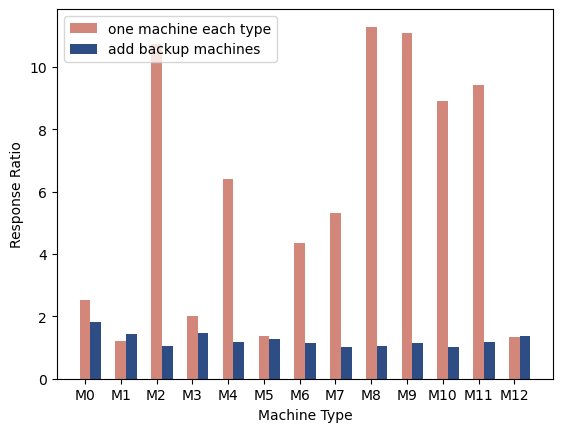

In [64]:
#histogram comparison
size = 13
x = np.arange(size)

x_data = ["M{}".format(i) for i in range(0,13)]
fund=[2.53, 1.20, 10.74, 2.02, 6.42, 1.37, 4.35, 5.33, 11.29, 11.1, 8.91, 9.42, 1.35]
improved=[1.82, 1.44, 1.05, 1.46, 1.19, 1.26, 1.15, 1.03, 1.063, 1.13, 1.02, 1.17, 1.36]

x_width = range(0,len(fund))
x2_width = [i+0.3 for i in x_width]
 
 
plt.bar(x_width,fund,lw=0.5,color='#D2877A',width=0.3,label="one machine each type")
plt.bar(x2_width,improved,lw=0.5,color='#2F4D85',width=0.3,label="add backup machines")
plt.legend(['one machine each type','add backup machines'])

plt.xlabel('Machine Type')
plt.ylabel('Response Ratio')

plt.xticks(range(0,13),x_data)

# visualization

In [65]:
import pandas as pd

In [66]:
occupied_percentage=[]
for i in range(len(track_time)):
    occupied_percentage.append(track_m_occupied[i]/total_m_num*100)

In [67]:
occupied_percentage

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 3.225806451612903,
 6.451612903225806,
 6.451612903225806,
 6.451612903225806,
 6.451612903225806,
 6.451612903225806,
 9.67741935483871,
 9.67741935483871,
 9.67741935483871,
 9.67741935483871,
 9.67741935483871,
 9.67741935483871,
 12.903225806451612,
 12.903225806451612,
 12.903225806451612,
 12.903225806451612,
 12.903225806451612,
 12.903225806451612,
 12.903225806451612,
 16.129032258064516,
 16.129032258064516,
 12.903225806451612,
 16.129032258064516,
 16.129032258064516,
 19.35483870967742,
 19.35483870967742,
 19.35483870967742,
 19.35483870967742,
 19.35483870967742,
 19.35483870967742,
 19.35483870967742,
 16.129032258064516,
 22.58064516129032,
 22.58064516129032,
 22.58064516129032,
 22.58064516129032,
 22.58064516129032,
 25.806451612903224,
 25.806451612903224,
 25.806451612903224,
 2

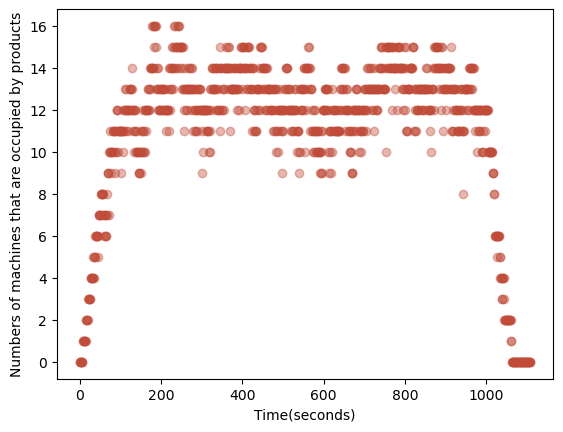

In [68]:
plt.figure()
x1 = np.array(track_time)
y1 = np.array(track_m_occupied)

plt.scatter(x1, y1, color='#C04B38', alpha=0.4)

plt.xlabel("Time(seconds)")
plt.ylabel("Numbers of machines that are occupied by products")
plt.show()

Text(0, 0.5, 'Percentage of machine occupation')

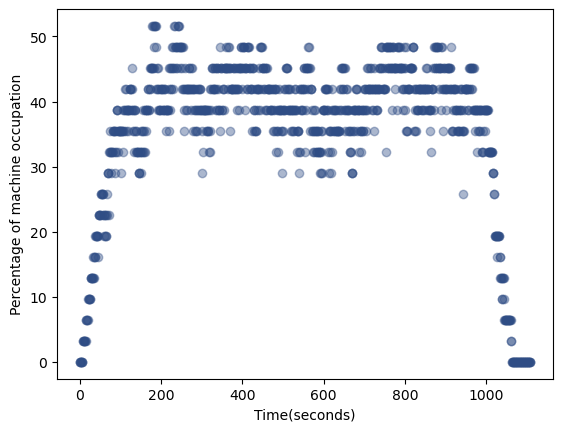

In [69]:
plt.figure()
x2 = np.array(track_time)
y2 = np.array(occupied_percentage)

plt.scatter(x2, y2, color='#2F4D85', alpha=0.4)

plt.xlabel('Time(seconds)')
plt.ylabel('Percentage of machine occupation')

In [71]:
block1

84

## Blocking Rate

In [72]:
max_block_num=0
max_block_time=0
total_block_num=0
average_block_num=0
average_blocking_rate=0

for i in range(len(track_time)):
    if (track_block2[i]>max_block_num):
        max_block_num=track_block2[i]
        max_block_time=i
for i in range(endtime):
    total_block_num=total_block_num+track_block2[i]
average_block_num=total_block_num/endtime
average_blocking_rate=average_block_num/inpro_seq[0]

In [73]:
print(f'The end time of the whole process is {endtime}')
print(f'The max block number is {max_block_num}, happens at time {max_block_time}.')
print(f'The average blocking number is {average_block_num}, the average blocking rate is {average_blocking_rate} ')

The end time of the whole process is 1110
The max block number is 5, happens at time 301.
The average blocking number is 1.181081081081081, the average blocking rate is 0.008436293436293436 


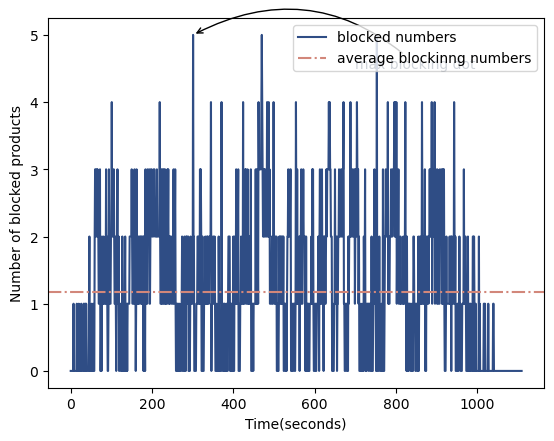

In [74]:
"""
blocking rate
figure out the number of products that are blocked by other products
"""
plt.figure()
plt.plot(track_time,track_block2,color='#2F4D85')
plt.axhline(y=average_block_num, color='#D2877A', linestyle='-.')
plt.annotate('max blocking dot', xy=(max_block_time,max_block_num), xycoords='data',xytext=(700,4.5),color='#112745',\
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.35"))
plt.xlabel('Time(seconds)')
plt.ylabel('Number of blocked products')
plt.legend(['blocked numbers','average blockinng numbers'], loc="upper right")